This notebook shows the method of estimating s/n using `dla_cnn.desi.preprocess.py/estimae_s2n`.

In [1]:
%matplotlib notebook
from dla_cnn.desi.DesiMock import DesiMock
from dla_cnn.data_model.Sightline import Sightline
from dla_cnn.desi.preprocess import estimate_s2n
from os.path import join
from matplotlib import pyplot as plt
import numpy as np

In [6]:
s2n = []
z_qso = []
file_num = [705,706,718,723,731,735,743,747,761,773,777,785,791]
for num in file_num:
    path = r"F:\Astronamy\desi-0.2-100\desi-0.2-100\desi-0.2-100\spectra-16\7"
    file_path = join(path,str(num))
    spectra = join(file_path,"spectra-16-%s.fits"%num)
    truth = join(file_path,"truth-16-%s.fits"%num)
    zbest = join(file_path,"zbest-16-%s.fits"%num)
    spec = DesiMock()
    spec.read_fits_file(spectra,truth,zbest)
    for key,value in spec.data.items():
        if value['z_qso']>=2.33:
            sightline = spec.get_sightline(key,camera='b')
            s2n.append(estimate_s2n(sightline))
            z_qso.append(sightline.z_qso)

In [7]:
len(z_qso)

6533

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.hist(s2n,bins=50,range = [5,125],density=True,histtype='barstacked')
plt.title("s/n distribution")
plt.xlabel("s2n")
plt.ylabel("frequency")
plt.savefig("F:/Astronamy/1.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


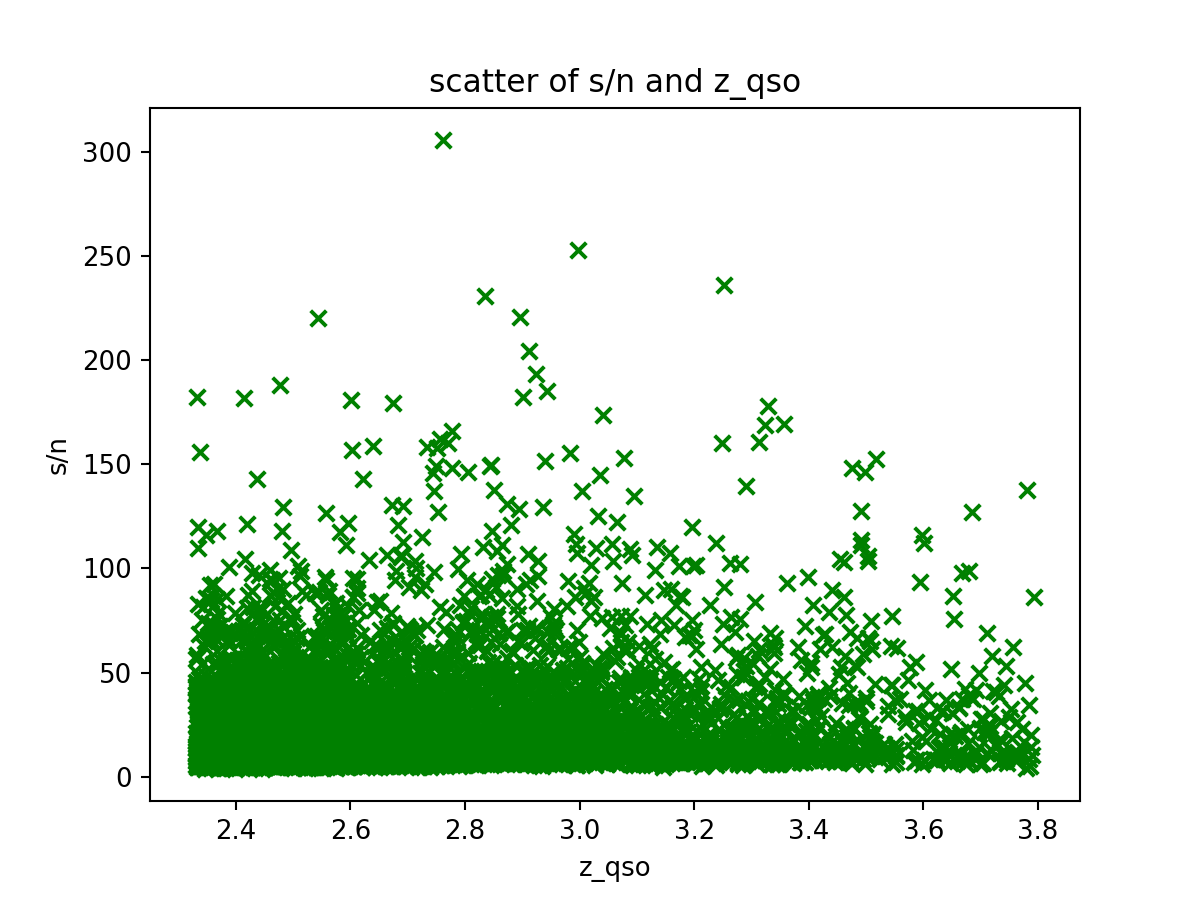

In [9]:
fig2 = plt.figure()
plt.scatter(z_qso,s2n,marker='x',color='g')
plt.xlabel('z_qso')
plt.ylabel('s/n')
plt.title("scatter of s/n and z_qso")
plt.savefig(r"F:/Astronamy/2.jpg")